In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
health_df = pd.read_csv("D:/BE Project/AI-dvriven-Driver-behaviour-Monitoring-System/Data/driver_health_data.csv")
vehicle_df = pd.read_csv("D:/BE Project/AI-dvriven-Driver-behaviour-Monitoring-System/Data/vehicle_data.csv")

In [5]:
print("Driver Health Data:")
display(health_df.head())

Driver Health Data:


,Timestamp,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Skin_Temperature,Galvanic_Skin_Response,Respiration_Rate,Sleep_Duration,Activity_Levels,Mood,...,Fuel_Consumption,Average_Speed,Work_Hours,Job_Stressors,Location_Latitude,Location_Longitude,Stress_Level,Mental_Health_History,Resilience_Factors,Mental_Health_Status
0,2019-01-01 00:00:00,98,177,99,36.854833,0.603660,20,4,4945,Happy,...,17.568925,78,12,5,51.002436,44.895265,Low,Yes,5,Normal
1,2019-01-01 01:00:00,111,133,86,37.239401,0.934820,24,5,6221,Happy,...,10.295241,25,8,9,42.839887,75.276677,Low,No,2,Moderate Stress
2,2019-01-01 02:00:00,88,154,113,36.209588,0.035483,28,1,6426,Anxious,...,8.515171,37,15,9,68.836583,20.795174,Low,No,4,Depression
3,2019-01-01 03:00:00,74,162,60,36.087569,0.653249,25,4,14435,Happy,...,13.774633,39,15,5,51.752928,89.835756,Low,No,1,Normal
4,2019-01-01 04:00:00,102,160,81,36.593949,0.756138,15,6,4334,Happy,...,18.747632,87,11,1,98.613250,86.654677,Low,No,2,Moderate Stress


In [6]:
health_df.columns

Index(['Timestamp', 'Heart_Rate', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Skin_Temperature',
       'Galvanic_Skin_Response', 'Respiration_Rate', 'Sleep_Duration',
       'Activity_Levels', 'Mood', 'Cognitive_Load', 'Social_Interaction',
       'Driving_Conditions', 'Route_Duration', 'Fuel_Consumption',
       'Average_Speed', 'Work_Hours', 'Job_Stressors', 'Location_Latitude',
       'Location_Longitude', 'Stress_Level', 'Mental_Health_History',
       'Resilience_Factors', 'Mental_Health_Status'],
      dtype='object')

In [7]:
health_df.isnull().sum()

Timestamp                   0
Heart_Rate                  0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Skin_Temperature            0
Galvanic_Skin_Response      0
Respiration_Rate            0
Sleep_Duration              0
Activity_Levels             0
Mood                        0
Cognitive_Load              0
Social_Interaction          0
Driving_Conditions          0
Route_Duration              0
Fuel_Consumption            0
Average_Speed               0
Work_Hours                  0
Job_Stressors               0
Location_Latitude           0
Location_Longitude          0
Stress_Level                0
Mental_Health_History       0
Resilience_Factors          0
Mental_Health_Status        0
dtype: int64

In [8]:
health_df.duplicated().sum()

0

In [9]:
# drop timestamp column
health_df = health_df.drop(columns=['Timestamp'])

In [10]:
health_df = health_df.head(1102)

In [11]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Heart_Rate                1102 non-null   int64  
 1   Blood_Pressure_Systolic   1102 non-null   int64  
 2   Blood_Pressure_Diastolic  1102 non-null   int64  
 3   Skin_Temperature          1102 non-null   float64
 4   Galvanic_Skin_Response    1102 non-null   float64
 5   Respiration_Rate          1102 non-null   int64  
 6   Sleep_Duration            1102 non-null   int64  
 7   Activity_Levels           1102 non-null   int64  
 8   Mood                      1102 non-null   object 
 9   Cognitive_Load            1102 non-null   int64  
 10  Social_Interaction        1102 non-null   int64  
 11  Driving_Conditions        1102 non-null   object 
 12  Route_Duration            1102 non-null   int64  
 13  Fuel_Consumption          1102 non-null   float64
 14  Average_

In [12]:
print("\nVehicle Data:")
display(vehicle_df.head())



Vehicle Data:


,timestamp,speed,rpm,throttle,brake,steering,heart_rate,stress_level,driver_state
0,0,32.219494,2095.670655,31.395206,0,-0.931460,61.209811,0.508672,drowsy
1,1,35.405169,1542.837201,27.859770,0,-2.849496,57.278086,0.711092,drowsy
2,2,78.225449,2511.662540,51.670909,1,-19.596701,92.186383,0.888176,aggressive
3,3,26.433372,1909.668891,22.607390,1,2.016433,84.074860,0.688775,distracted
4,4,60.898582,1620.358412,27.504386,0,0.889684,64.810851,0.296210,eco-driving


In [13]:
vehicle_df.columns

Index(['timestamp', 'speed', 'rpm', 'throttle', 'brake', 'steering',
       'heart_rate', 'stress_level', 'driver_state'],
      dtype='object')

In [14]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1200 non-null   int64  
 1   speed         1200 non-null   float64
 2   rpm           1200 non-null   float64
 3   throttle      1200 non-null   float64
 4   brake         1200 non-null   int64  
 5   steering      1200 non-null   float64
 6   heart_rate    1200 non-null   float64
 7   stress_level  1200 non-null   float64
 8   driver_state  1200 non-null   object 
dtypes: float64(6), int64(2), object(1)
memory usage: 84.5+ KB


In [15]:
vehicle_df.shape

(1200, 9)

In [16]:
vehicle_df.isnull().sum()

timestamp       0
speed           0
rpm             0
throttle        0
brake           0
steering        0
heart_rate      0
stress_level    0
driver_state    0
dtype: int64

In [17]:
vehicle_df.duplicated().sum()

0

In [18]:
vehicle_df=vehicle_df.head(1102)

C:\Users\dhans\AppData\Local\Temp\ipykernel_18588\1326216301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vehicle_df, x="driver_state", order=vehicle_df["driver_state"].value_counts().index, palette="Set2")


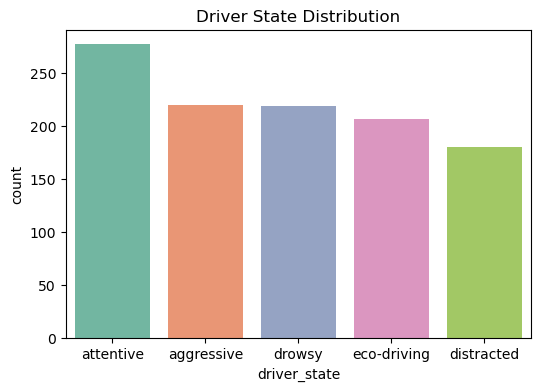

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=vehicle_df, x="driver_state", order=vehicle_df["driver_state"].value_counts().index, palette="Set2")
plt.title("Driver State Distribution")
plt.show()

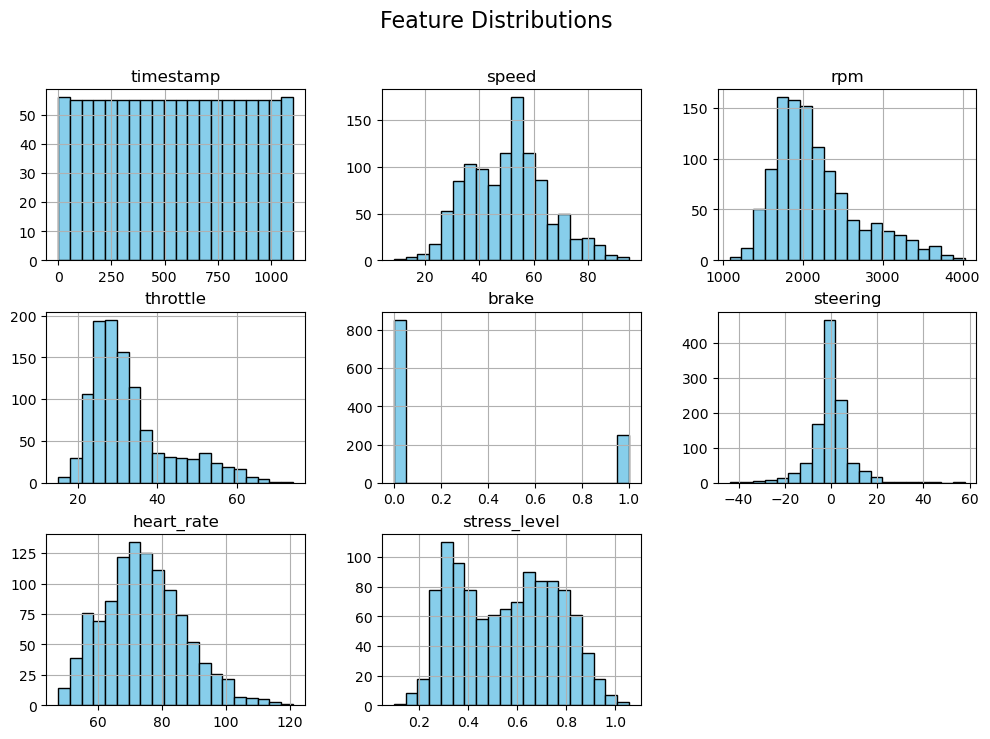

In [20]:
vehicle_df.hist(figsize=(12,8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

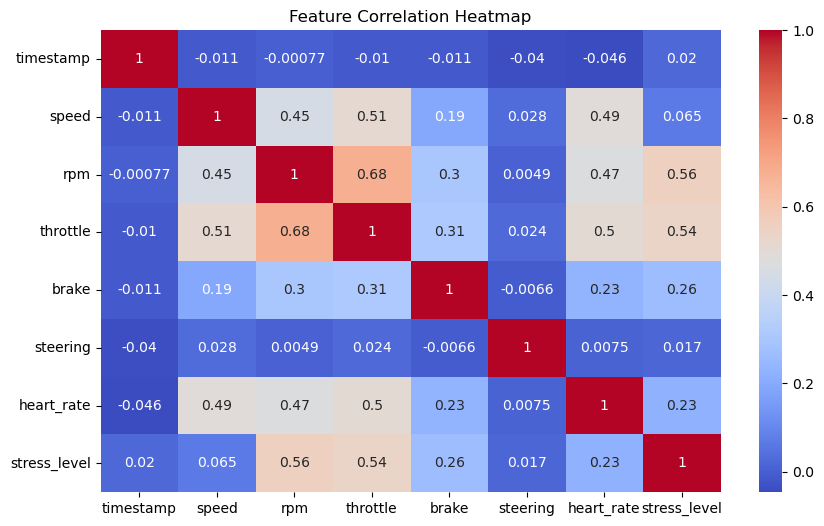

In [ ]:
#  Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(vehicle_df.drop(columns=["driver_state"]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [22]:
# Drop timestamp and GPS columns (not needed for classification)
vehicle_features = vehicle_df.drop(columns=["timestamp"])

In [23]:
# Check for missing values
print("\nMissing values in Vehicle Data:")
print(vehicle_features.isnull().sum())


Missing values in Vehicle Data:
speed           0
rpm             0
throttle        0
brake           0
steering        0
heart_rate      0
stress_level    0
driver_state    0
dtype: int64


In [24]:
# Merge Vehicle + Health Data


merged_df = pd.concat([vehicle_features.reset_index(drop=True),
                       health_df.reset_index(drop=True)], axis=1)

In [ ]:
print("\nCombined Data Sample:")
display(merged_df.head())
# np.save("combined_data.npy", merged_df)


Combined Data Sample:


,speed,rpm,throttle,brake,steering,heart_rate,stress_level,driver_state,Heart_Rate,Blood_Pressure_Systolic,...,Fuel_Consumption,Average_Speed,Work_Hours,Job_Stressors,Location_Latitude,Location_Longitude,Stress_Level,Mental_Health_History,Resilience_Factors,Mental_Health_Status
0,32.219494,2095.670655,31.395206,0,-0.931460,61.209811,0.508672,3,98,177,...,17.568925,78,12,5,51.002436,44.895265,Low,Yes,5,Normal
1,35.405169,1542.837201,27.859770,0,-2.849496,57.278086,0.711092,3,111,133,...,10.295241,25,8,9,42.839887,75.276677,Low,No,2,Moderate Stress
2,78.225449,2511.662540,51.670909,1,-19.596701,92.186383,0.888176,0,88,154,...,8.515171,37,15,9,68.836583,20.795174,Low,No,4,Depression
3,26.433372,1909.668891,22.607390,1,2.016433,84.074860,0.688775,2,74,162,...,13.774633,39,15,5,51.752928,89.835756,Low,No,1,Normal
4,60.898582,1620.358412,27.504386,0,0.889684,64.810851,0.296210,4,102,160,...,18.747632,87,11,1,98.613250,86.654677,Low,No,2,Moderate Stress


In [26]:
# Encode Target Labels
# 'driver_state' is the target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_df['driver_state'] = label_encoder.fit_transform(merged_df['driver_state'])

In [27]:
print("\nEncoded Driver States Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Encoded Driver States Mapping:
{'aggressive': 0, 'attentive': 1, 'distracted': 2, 'drowsy': 3, 'eco-driving': 4}


In [28]:
# Split features/labels
X = merged_df.drop(columns=['driver_state'])
X = X.select_dtypes(include=[np.number])   # <-- keeps only numeric features

y = merged_df['driver_state']

In [ ]:
# # Step 11: Save Combined Raw Data

# merged_df.to_csv("combined_numerical_raw.csv", index=False)
# print("✅ Combined raw data saved as 'combined_numerical_raw.csv'")

# #  Save Scaled Data

# scaled_df = pd.DataFrame(X_scaled, columns=X.columns if hasattr(X,'columns') else merged_df.drop(columns=['driver_state']).columns)
# scaled_df["driver_state"] = y.values  # add back target

# scaled_df.to_csv("combined_numerical_scaled.csv", index=False)
# print("✅ Scaled combined data saved as 'combined_numerical_scaled.csv'")


✅ Combined raw data saved as 'combined_numerical_raw.csv'
✅ Scaled combined data saved as 'combined_numerical_scaled.csv'


In [29]:
#  Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
# Train RandomForest
# ============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("\nRandomForest Accuracy:", rf_acc)
print(classification_report(y_test, rf_preds, target_names=label_encoder.classes_))


RandomForest Accuracy: 0.9140271493212669
              precision    recall  f1-score   support

  aggressive       0.94      1.00      0.97        44
   attentive       0.84      0.84      0.84        56
  distracted       0.94      0.89      0.91        36
      drowsy       0.98      1.00      0.99        44
 eco-driving       0.90      0.85      0.88        41

    accuracy                           0.91       221
   macro avg       0.92      0.92      0.92       221
weighted avg       0.91      0.91      0.91       221



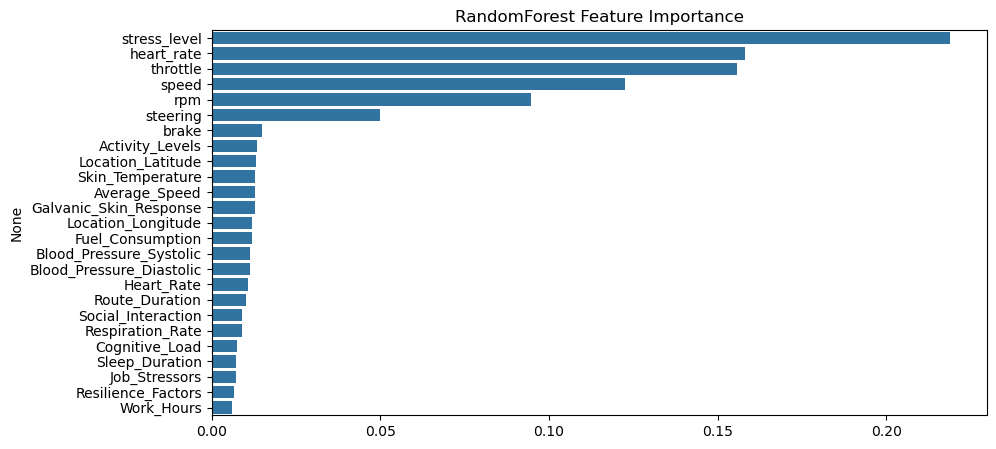

In [32]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("RandomForest Feature Importance")
plt.show()

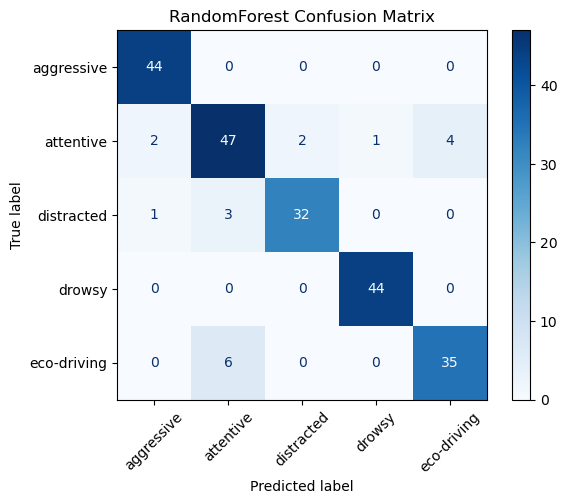

In [33]:
#Confusion Matrix (RandomForest)
# ============================
rf_preds = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp_rf.plot(cmap="Blues", xticks_rotation=45)
plt.title("RandomForest Confusion Matrix")
plt.show()

In [34]:
# Train XGBoost
# ============================
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)
print("\nXGBoost Accuracy:", xgb_acc)
print(classification_report(y_test, xgb_preds, target_names=label_encoder.classes_))

c:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:09:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.918552036199095
              precision    recall  f1-score   support

  aggressive       1.00      1.00      1.00        44
   attentive       0.83      0.88      0.85        56
  distracted       0.94      0.83      0.88        36
      drowsy       0.96      0.98      0.97        44
 eco-driving       0.90      0.90      0.90        41

    accuracy                           0.92       221
   macro avg       0.93      0.92      0.92       221
weighted avg       0.92      0.92      0.92       221



C:\Users\dhans\AppData\Local\Temp\ipykernel_18588\997233843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances[indices], y=X.columns[indices], palette="mako")


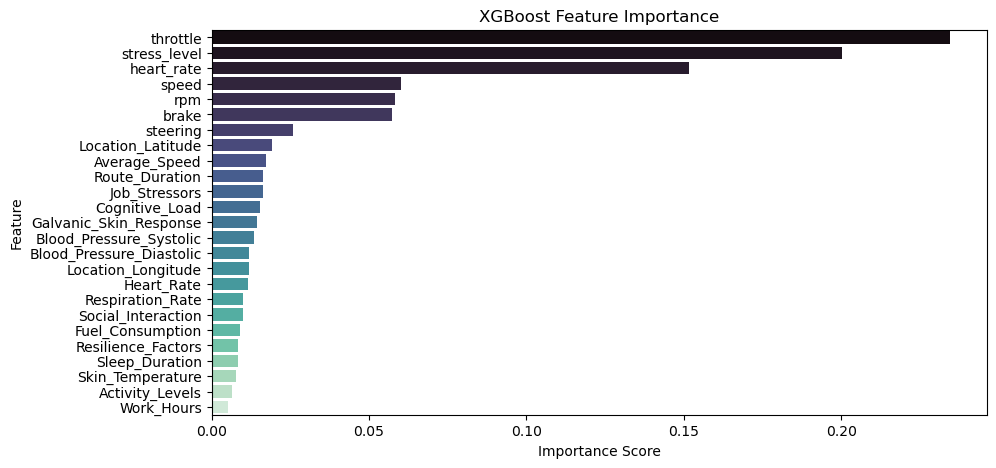

In [35]:
xgb_importances = xgb_model.feature_importances_
indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(x=xgb_importances[indices], y=X.columns[indices], palette="mako")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

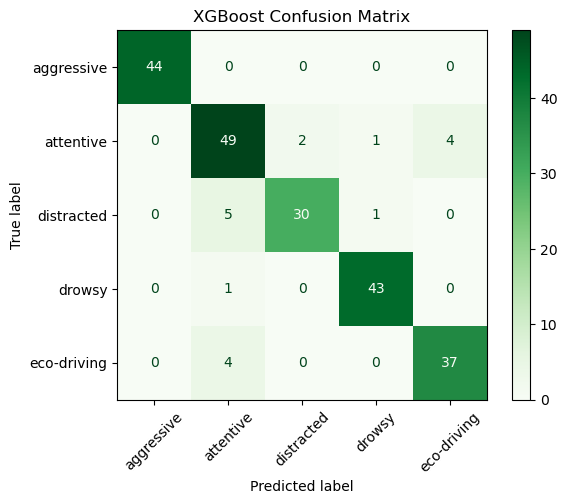

In [36]:
# Confusion Matrix (XGBoost)
# ============================
xgb_preds = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, xgb_preds)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=label_encoder.classes_)
disp_xgb.plot(cmap="Greens", xticks_rotation=45)
plt.title("XGBoost Confusion Matrix")
plt.show()

In [37]:
! pip install XGBoost

In [38]:
# Train MLP (Neural Network)
# ============================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = mlp_model.fit(X_train, y_train_cat, epochs=20, batch_size=32, 
                        validation_data=(X_test, y_test_cat), verbose=1)

mlp_acc = mlp_model.evaluate(X_test, y_test_cat, verbose=0)[1]
print("\nMLP Accuracy:", mlp_acc)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2617 - loss: 1.5944 - val_accuracy: 0.6380 - val_loss: 1.1867
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5373 - loss: 1.2027 - val_accuracy: 0.7602 - val_loss: 0.8763
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6373 - loss: 0.9312 - val_accuracy: 0.8100 - val_loss: 0.6609
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7476 - loss: 0.7129 - val_accuracy: 0.8552 - val_loss: 0.5271
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 0.5938 - val_accuracy: 0.8643 - val_loss: 0.4375
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7815 - loss: 0.5589 - val_accuracy: 0.8824 - val_loss: 0.3821
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8031 - loss: 0.5027 - val_accuracy: 0.8869 - val_loss: 0.3387
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8304 - loss: 0.4411 - val_accuracy: 0.9095 - val_loss:

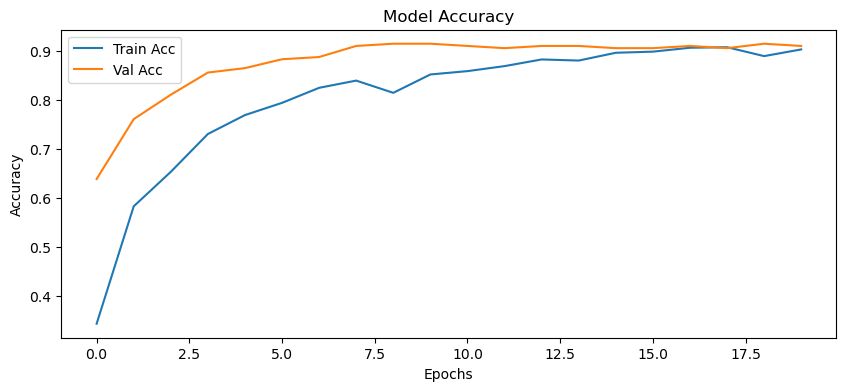

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [40]:
# Plot Training Curves
# ============================
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(10,4))

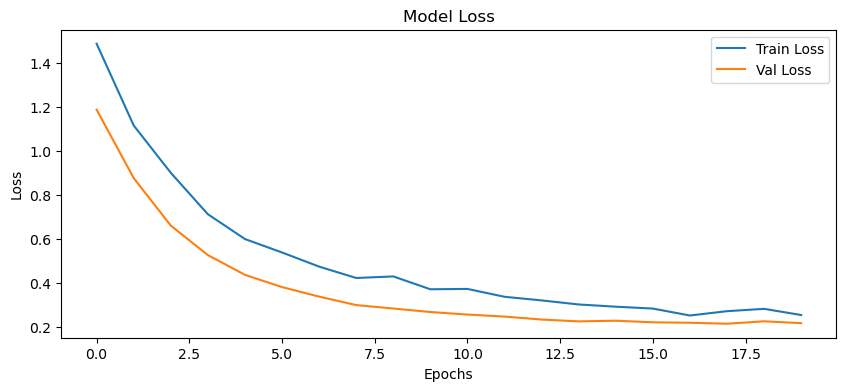

In [41]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [42]:
# Compare Results

print("\nModel Comparison:")
print("RandomForest:", rf_acc)
print("XGBoost:", xgb_acc)
print("MLP:", mlp_acc)


Model Comparison:
RandomForest: 0.9140271493212669
XGBoost: 0.918552036199095
MLP: 0.9095022678375244


In [43]:
# Step 5: Save Model + Scaler + Label Encoder
# ============================
import joblib

joblib.dump(rf_model, "random_forest_driver.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("✅ RandomForest model, scaler, and label encoder saved!")

# ============================
# Step 6: Load and Test
# ============================
loaded_model = joblib.load("random_forest_driver.pkl")
loaded_scaler = joblib.load("scaler.pkl")
loaded_encoder = joblib.load("label_encoder.pkl")


✅ RandomForest model, scaler, and label encoder saved!


In [45]:
# Example: predict on one new sample
sample = X_test[7].reshape(1, -1)
prediction = loaded_model.predict(sample)
print("Predicted class:", loaded_encoder.inverse_transform(prediction)[0])

Predicted class: attentive
